In [506]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import healpy as hp

from astropy.coordinates import SkyCoord
import astropy.units as u

import sys
# sys.path.append('src/')
from pSZ import pSZ
from profiles import cNFW_grid, cNFW, M500toR500

import scipy.ndimage as ndimage
import scipy.interpolate

arcmin2rad = np.pi / 180. / 60. 
rad2arcmin = 1./arcmin2rad

def GaussSmooth(map, fwhm, reso, order=0):
    """
    Smooth the map with a Gaussian beam specified by its FWHM (in arcmin).
    - fwhm: 
    - reso: pixel resolution (in arcmin)
    """
    # reso_  = reso * 180.*60./np.pi # in arcmin
    sigma  = fwhm / np.sqrt(8*np.log(2)) / reso
    # print("\t smoothing map with sigma = %4f" %sigma)
    return ndimage.gaussian_filter(map, sigma=sigma, order=order)

def GenerateRndPointsS2(size, ra_min=0, ra_max=360, dec_min=-90, dec_max=90 ):
    ras  = np.rad2deg(np.random.uniform(np.deg2rad(ra_min), np.deg2rad(ra_max), size))
    decs = np.rad2deg(np.arcsin(np.random.uniform(np.sin(np.deg2rad(dec_min)),np.sin(np.deg2rad(dec_max)), size)))
    return ras, decs

def Equatorial2Galactic(ra, dec):
    c_eq = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
    c_gal = c_eq.transform_to('galactic')
    return c_gal.l.degree, c_gal.b.degree

def R5002M500(theory, z, Mmin=1e13, Mmax=1e16):
    return scipy.optimize.brentq(lambda M: M500toR500(theory.bkd, z, M=M)-1, Mmin, Mmax)

def M5002Theta500(theory, z, M500):
    R500 = M500toR500(theory.bkd, z, M=M500)
    d_A = theory.bkd.angular_diameter_distance(z)
    return np.rad2deg(R500/d_A) * 60 # arcmin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
theory = pSZ()


9.457812915945686e-27 1.008266641788727 393.9862254904859 7.474665814854842
1.053684801321415e-26 1.0039982637043463 703.9873665606874 4.165484436351112
1.9194535898280418e-26 1.0033591877795045 1516.4125555964401 1.9325755474199635


Text(0, 0.5, '$\\tau(\\theta,z)E(z)^{-2}$')

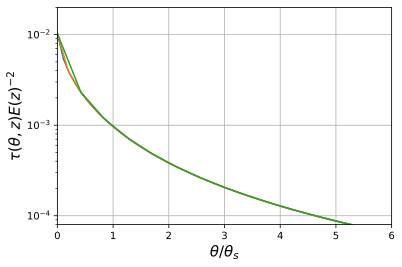

In [68]:
thetas = np.linspace(0,40)
plt.semilogy(thetas/7.5,  cNFW(theory.bkd, thetas, 0.1, M=3e14)*(theory.bkd.hubble_parameter(0.1)/67.8)**(-2))
plt.semilogy(thetas/4.16, cNFW(theory.bkd, thetas, 0.2, M=3.3e14)*(theory.bkd.hubble_parameter(0.2)/67.8)**(-2))
plt.semilogy(thetas/1.93, cNFW(theory.bkd, thetas, 0.7, M=6e14)*(theory.bkd.hubble_parameter(0.7)/67.8)**(-2))
plt.grid()
plt.ylim(8e-5,2e-2)
plt.xlim(0,6)
plt.xlabel(r'$\theta/\theta_s$',size=15)
plt.ylabel(r'$\tau(\theta,z)E(z)^{-2}$',size=15)


In [69]:
M = 4e14

In [467]:
tau = cNFW_grid(theory.bkd, 0.4, M=M)

In [468]:
N = tau.shape[0]
ones = np.ones(N)
inds  = (np.arange(N) + .5 - N/2.)

## angles relative to 1 degrees
R = np.outer(ones, inds) * 0.2 /60.

In [19]:
101*0.2/60

0.3366666666666667

In [461]:
10*2/0.2

100.0

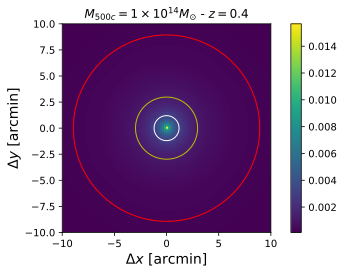

In [558]:
# circle1 = plt.Circle((N/2-1/2, N/2-1/2), 10/0.2, color='r', fill=False)
# circle2 = plt.Circle((N/2-1/2, N/2-1/2), 1.2/0.2, color='w', fill=False)
# circle3 = plt.Circle((N/2-1/2, N/2-1/2), 3/0.2, color='y', fill=False)

# circle1 = plt.Circle((0, 0), 10, color='r', fill=False)
# circle2 = plt.Circle((0, 0), 1.2, color='w', fill=False) #beam
# circle3 = plt.Circle((0, 0), M5002Theta500(theory, 0.4, M), color='y', fill=False)

circle2 = plt.Circle((0, 0), 1.2, color='w', fill=False)
circle3 = plt.Circle((0, 0), M5002Theta500(theory, 0.4, M), color='y', fill=False)
circle1 = plt.Circle((0, 0), 3*M5002Theta500(theory, 0.4, M), color='r', fill=False)
# circle1 = plt.Circle((0, 0), 10, color='r', fill=False)


fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
im = ax.imshow(tau, extent=[-10,10,-10,10])
# im = ax.imshow(GaussSmooth(tau, 1.2, 0.2),)#extent=[])
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
plt.colorbar(im)
plt.title(r'$M_{500c}=1\times 10^{14}M_{\odot}$ - $z=0.4$')
plt.xlabel(r'$\Delta x$ [arcmin]',size=14)
plt.ylabel(r'$\Delta y$ [arcmin]',size=14)
plt.tight_layout()
plt.savefig('plots/optical_depth_cnfw_1e14_z0p4')

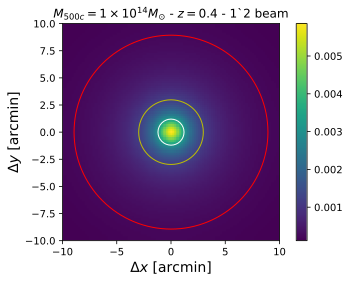

In [559]:
# circle1 = plt.Circle((N/2-1/2, N/2-1/2), 10/0.2, color='r', fill=False)
# circle2 = plt.Circle((N/2-1/2, N/2-1/2), 1.2/0.2, color='w', fill=False)
# circle3 = plt.Circle((N/2-1/2, N/2-1/2), 3/0.2, color='y', fill=False)

circle2 = plt.Circle((0, 0), 1.2, color='w', fill=False)
circle3 = plt.Circle((0, 0), M5002Theta500(theory, 0.4, M), color='y', fill=False)
circle1 = plt.Circle((0, 0), 3*M5002Theta500(theory, 0.4, M), color='r', fill=False)
# circle1 = plt.Circle((0, 0), 10, color='r', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
im = ax.imshow(GaussSmooth(tau, 1.2, 0.2), extent=[-10,10,-10,10])
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
plt.colorbar(im)
plt.title(r'$M_{500c}=1\times 10^{14}M_{\odot}$ - $z=0.4$ - 1`2 beam')
plt.xlabel(r'$\Delta x$ [arcmin]',size=14)
plt.ylabel(r'$\Delta y$ [arcmin]',size=14)
plt.savefig('plots/optical_depth_cnfw_1e14_z0p4_sptbeam')

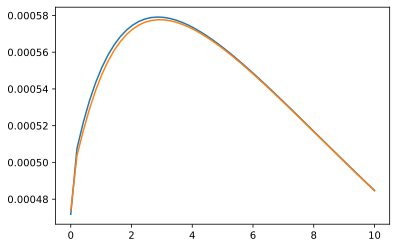

In [505]:
theta_max = 10.
plt.plot(np.linspace(0,theta_max), [np.mean(tau[R< i/60]) for i in np.linspace(0,theta_max)])
plt.plot(np.linspace(0,theta_max), [np.mean(GaussSmooth(tau, 1.2, 0.2)[R < i/60]) for i in np.linspace(0,theta_max)])

In [10]:
M500toR500(theory.bkd, 0.4, M=4e14)

0.9905693321279235

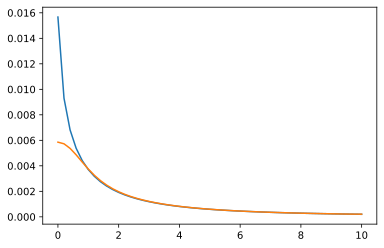

In [502]:
plt.plot(R[int(101/2),int(101/2):]*60, tau[int(101/2),int(101/2):])
plt.plot(R[int(101/2),int(101/2):]*60, GaussSmooth(tau, 1.2, 0.2)[int(101/2),int(101/2):])

In [499]:
np.rad2deg(M500toR500(theory.bkd, 0.4, M=4e14)/theory.bkd.angular_diameter_distance(0.4))*60

2.9777156512394813

In [70]:
Pc_z0p4, Qc_z0p4, Uc_z0p4 = theory.remote_quadrupole(0.4, nside=2048, return_QU=1)

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [71]:
Pu_z0p4, Qu_z0p4, Uu_z0p4 = theory.uncorrelated_quadrupole(0.4, nside=2048, return_QU=1, lmax=10)

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [525]:
Pu_z0p4

array([2.24175419, 2.24134086, 2.24020944, ..., 2.65662442, 2.65658654,
       2.65620423])

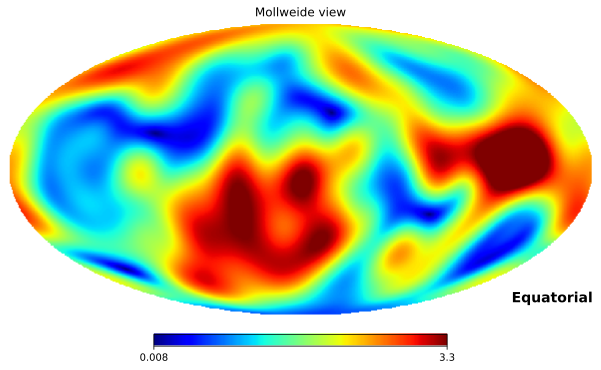

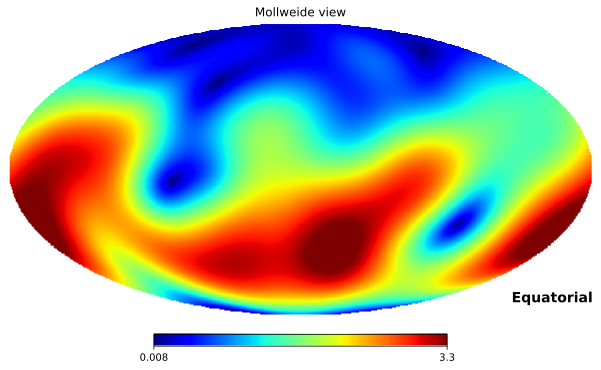

In [72]:
hp.mollview(Pu_z0p4,fig=(121),cmap='jet', coord=['G','C'], min=0.008, max=3.3);
hp.mollview(Pc_z0p4,fig=(122),cmap='jet', coord=['G','C'], min=0.008, max=3.3)

In [15]:
np.mean(Pu_z0p4/Pc_z0p4)

0.9268214068865624

In [448]:
lmax=10
z=0.4
ells = np.arange(2,lmax+1)
zeta_tmp = np.asarray([theory.zeta(z, ell) for ell in ells])
xi_tmp = np.asarray([theory.xi(z, z, ell) for ell in ells])
xi_z2_tmp = np.asarray([theory.xi(z, z+0.1, ell) for ell in ells])
puncorr = xi_tmp - zeta_tmp**2/theory.cltt[2:lmax+1]
pcorr = zeta_tmp**2/theory.cltt[2:lmax+1]


In [74]:
xi_tmp, zeta_tmp, zeta_tmp**2, theory.cltt[2:lmax+1], zeta_tmp**2/theory.cltt[2:lmax+1]

(array([4.29213240e+01, 2.77070646e+00, 6.23505111e-01, 2.33002191e-01,
        1.07499609e-01, 5.69158697e-02, 3.31293071e-02, 2.06751297e-02,
        1.36026344e-02]),
 array([-1.80090599e+02, -3.29078904e+01, -7.32107679e+00, -2.57951984e+00,
        -1.22374786e+00, -6.66297946e-01, -3.93076660e-01, -2.45968631e-01,
        -1.61620861e-01]),
 array([3.24326237e+04, 1.08292925e+03, 5.35981654e+01, 6.65392258e+00,
        1.49755884e+00, 4.43952953e-01, 1.54509261e-01, 6.05005674e-02,
        2.61213026e-02]),
 array([1017.46016767,  481.91321353,  273.48604977,  174.44164329,
         120.70421072,   88.64332846,   68.04794568,   54.08310163,
          44.17811067]),
 array([3.18760623e+01, 2.24714580e+00, 1.95981351e-01, 3.81441177e-02,
        1.24068483e-02, 5.00830644e-03, 2.27059405e-03, 1.11865935e-03,
        5.91272514e-04]))

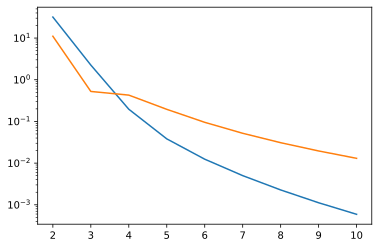

In [75]:
plt.semilogy(ells, pcorr,)
plt.semilogy(ells, puncorr)

masked_array(
  data=[[1.25148355, 1.25148355, 1.25148355, ..., 1.29230487, 1.29230487,
         1.29230487],
        [1.25148355, 1.25148355, 1.25148355, ..., 1.29230487, 1.29230487,
         1.29230487],
        [1.25148355, 1.25148355, 1.25443233, ..., 1.29015   , 1.29230487,
         1.29230487],
        ...,
        [1.25877329, 1.25877329, 1.26090977, ..., 1.29659409, 1.29955171,
         1.29955171],
        [1.25877329, 1.25877329, 1.25877329, ..., 1.29955171, 1.29955171,
         1.29955171],
        [1.25877329, 1.25877329, 1.25877329, ..., 1.29955171, 1.29955171,
         1.29955171]],
  mask=False,
  fill_value=-1.6375e+30)

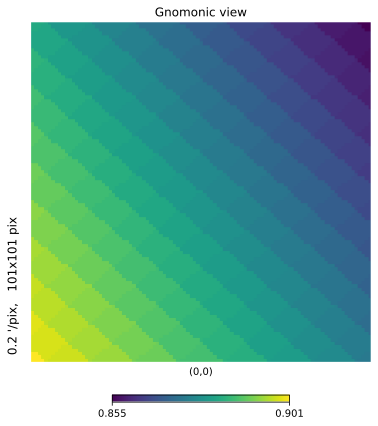

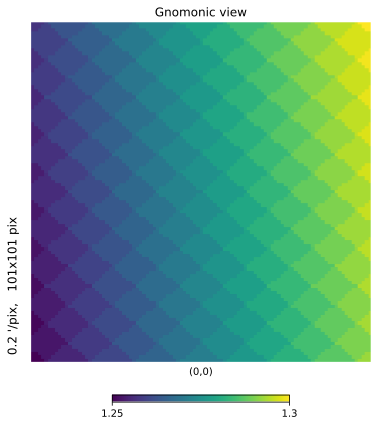

In [244]:
hp.gnomview(Pc_z0p4, reso=0.2, xsize=101, return_projected_map=1)#;plt.close()
hp.gnomview(Pu_z0p4, reso=0.2, xsize=101, return_projected_map=1)#;plt.close()


In [230]:
Pcorr_zoom = hp.gnomview(Pc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()
Qcorr_zoom = hp.gnomview(Qc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()
Ucorr_zoom = hp.gnomview(Uc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()


In [161]:
ras_3g, decs_3g = GenerateRndPointsS2(1000, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )

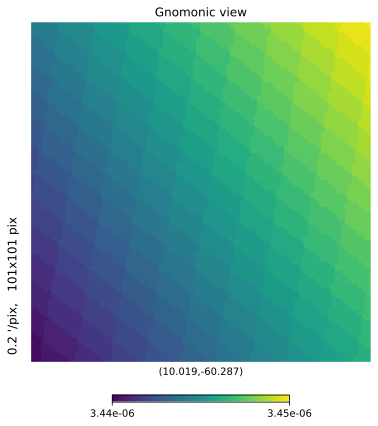

In [175]:
Pcorr_zoom = hp.gnomview(Pc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1)
Qcorr_zoom = hp.gnomview(Qc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1);plt.close()
Ucorr_zoom = hp.gnomview(Uc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1);plt.close()


In [229]:
d = (GaussSmooth(Qcorr_zoom, 1.2, 0.2) + 1j*GaussSmooth(Ucorr_zoom, 1.2, 0.2))*GaussSmooth(tau, 1.2, 0.2)
p = (GaussSmooth(Qcorr_zoom, 1.2, 0.2) + 1j*GaussSmooth(Ucorr_zoom, 1.2, 0.2))
# d = (Qcorr_zoom + 1j*Ucorr_zoom)*GaussSmooth(tau, 1.2, 0.2)

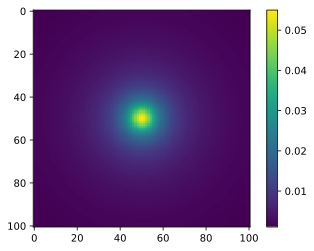

In [230]:
plt.imshow(np.abs(d)*2.725e6);plt.colorbar()

In [222]:
np.sum((d*GaussSmooth(tau, 1.2, 0.2))[R < 3./60])/np.sum(GaussSmooth(tau, 1.2, 0.2)[R < 3/60]**2)

(2.8348663789846636e-07-3.4326427789229478e-06j)

In [207]:
np.mean(p[R < 3./60])

(2.971759954071956e-07-3.4306464443730377e-06j)

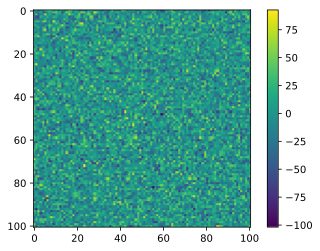

In [198]:
plt.imshow(np.abs(d)*2.725e6+np.random.randn(101**2).reshape((101,101))*(5. / 0.2));plt.colorbar()

In [270]:
1./np.dot(GaussSmooth(tau, 1.2, 0.2).flatten(), np.dot(np.diag(np.ones(101*101)*1./(5. / 0.2)**2), GaussSmooth(tau, 1.2, 0.2).flatten()) )

104887.44376280325

In [273]:
((5. / 0.2)**2/np.sum(GaussSmooth(tau, 1.2, 0.2)**2))

104887.44376280323

In [286]:
np.sqrt(((5. / 0.2)**2/np.sum(GaussSmooth(tau, 1.2, 0.2)**2)))

323.8633103066836

In [288]:
tau_smooth = GaussSmooth(tau, 1.2, 0.2)

In [443]:
def GetNoiseMap(npix, delta_P, reso):
    return np.random.randn(npix**2).reshape((npix,npix))*(delta_P / reso)

def GetP(data, tau, theta_max, R):
    """
    tau already beam smoothed
    """
#     print(data)
    return np.sum((data*tau)[R < theta_max/60])/np.sum(tau[R < theta_max/60]**2)
    

class pSZSims():
    def __init__(self, theory, ):
        self.theory = theory
        
    def GetVarAlphaManyBins(self, nclusters, zmin, zmax, nz, white_noise, beam, reso, theta_max=5, theta_max_profile=20, quad=None, marginalize_bkd=False):       
        dz = (zmax-zmin)/nz
        nclusters_bin = int(nclusters/nz)
        print(dz,nclusters_bin)

        p_c = np.zeros((int(nz),int(2*nclusters_bin)), dtype=complex)       
        C_p_inv = np.zeros(int(2*nz*nclusters_bin))

        for idz in range(nz):
            z_tmp = (0.5*(np.linspace(zmin,zmax,nz+1)[1:]+np.linspace(zmin,zmax,nz+1)[:-1]))[idz]
            print(z_tmp)
            
            M500 = R5002M500(self.theory, z_tmp) # Find mass corresponding to R500 = 1 Mpc
            theta_max_tmp = theta_max * np.rad2deg(1./theory.bkd.angular_diameter_distance(z_tmp))*60
            print(M500/1e14,theta_max_tmp)
        
            # Generate tau profile
            tau = cNFW_grid(self.theory.bkd, z_tmp, M=M500, reso=reso, theta_max=theta_max_profile)
            tau_beam = GaussSmooth(tau, beam, reso)

            N = tau.shape[0]
            ones = np.ones(N)
            inds  = (np.arange(N) + .5 - N/2.)
            R = np.outer(ones, inds) * reso /60.

            tau2_mean = np.mean(tau_beam[R<theta_max_tmp/60]**2)
            tau_mean2 = np.mean(tau_beam[R<theta_max_tmp/60])**2
            npix = len(tau_beam[R<theta_max_tmp/60])
            
            if marginalize_bkd == 1:
                var_p = 2*((white_noise / reso)**2/(npix*(tau2_mean-tau_mean2))) 
            else:
                var_p = 2*((white_noise / reso)**2/np.sum(tau_beam[R<theta_max_tmp/60]**2))
                           
            C_p_inv[int(idz*2*nclusters_bin):int((idz+1)*2*nclusters_bin)] = 1/var_p
            
            # Generate random cluster locations
            ras_3g_tmp, decs_3g_tmp = GenerateRndPointsS2(nclusters_bin, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )
            l_3g_tmp, b_3g_tmp = Equatorial2Galactic(ras_3g_tmp, decs_3g_tmp)

            if quad is None:
                Pc_tmp, Qc_tmp, Uc_tmp = self.theory.remote_quadrupole(z_tmp, nside=2048, return_QU=1)
            else:
                Pc_tmp, Qc_tmp, Uc_tmp = quad

            for idx in range(nclusters_bin):
                # Extract cutouts
                Qcorr_tmp = hp.gnomview(Qc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
                Ucorr_tmp = hp.gnomview(Uc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
                p_plus_tmp = (Qcorr_tmp + 1j*Ucorr_tmp) #* tau_beam    # muK
                p_minus_tmp = (Qcorr_tmp - 1j*Ucorr_tmp) # * tau_beam  # muK
                p_c[idz,idx] = GetP(p_plus_tmp, np.ones_like(Qcorr_tmp), theta_max_tmp, R) # This is the mean of P_c within theta_max
                p_c[idz,idx+int(nclusters_bin)] = p_c[idz,idx].conj()#GetP(p_minus_tmp, np.ones_like(Qcorr_tmp), theta_max, R
    
        C_p_inv = np.diag(C_p_inv)
        p_c = p_c.flatten()
            
        var_alpha = 1./np.dot(p_c.conj().T, np.dot(C_p_inv, p_c))
        
        return var_alpha.real
                    
    def GetVarAlpha(self, nclusters, z, M, white_noise, beam, reso, theta_max, theta_max_profile=20, quad=None):
        tau = cNFW_grid(self.theory.bkd, z, M=M, reso=reso, theta_max=theta_max_profile)
        tau_beam = GaussSmooth(tau, beam, reso)
        
        N = tau.shape[0]
        ones = np.ones(N)
        inds  = (np.arange(N) + .5 - N/2.)
        R = np.outer(ones, inds) * reso /60.
        
        ras_3g_tmp, decs_3g_tmp = GenerateRndPointsS2(nclusters, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )
        
        l_3g_tmp, b_3g_tmp = Equatorial2Galactic(ras_3g_tmp, decs_3g_tmp)
        
        if quad is None:
            Pc_tmp, Qc_tmp, Uc_tmp = self.theory.remote_quadrupole(z, nside=2048, return_QU=1)
        else:
            Pc_tmp, Qc_tmp, Uc_tmp = quad
        
        var_p = 2*((white_noise / reso)**2/np.sum(tau_beam[R<theta_max/60]**2))
        
        p_c = np.zeros(2*nclusters, dtype=complex)       

        for idx in range(nclusters):
#             print(idx)
            # Extract cutouts
            Qcorr_tmp = hp.gnomview(Qc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
            Ucorr_tmp = hp.gnomview(Uc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
            p_plus_tmp = (Qcorr_tmp + 1j*Ucorr_tmp) #* tau_beam    # muK
            p_minus_tmp = (Qcorr_tmp - 1j*Ucorr_tmp) # * tau_beam  # muK
            p_c[idx] = GetP(p_plus_tmp, np.ones_like(Qcorr_tmp), theta_max, R) # This is the mean of P_c within theta_max
            p_c[idx+int(nclusters)] = p_c[idx].conj()#GetP(p_minus_tmp, np.ones_like(Qcorr_tmp), theta_max, R)
        
        C_p_inv = np.diag(np.ones(2*nclusters)/var_p)
        var_alpha = 1./np.dot(p_c.conj().T, np.dot(C_p_inv, p_c))
        return var_alpha.real

    
    def GetS2N(self, nclusters, z, M, white_noise, beam, reso, theta_max, theta_max_profile=20, nsims=1, quad=None):
        tau = cNFW_grid(self.theory.bkd, z, M=M, reso=reso, theta_max=theta_max_profile)
        tau_beam = GaussSmooth(tau, beam, reso)
               
        N = tau.shape[0]
        ones = np.ones(N)
        inds  = (np.arange(N) + .5 - N/2.)
        R = np.outer(ones, inds) * reso /60.

        if quad is None:
            Pc_tmp, Qc_tmp, Uc_tmp = self.theory.remote_quadrupole(z, nside=2048, return_QU=1)
        else:
            Pc_tmp, Qc_tmp, Uc_tmp = quad
        
        var_p = 2*((white_noise / reso)**2/np.sum(tau_beam[R<theta_max/60]**2))
        
        S2N = np.zeros(nsims)
        
        for isim in range(nsims):

            ras_3g_tmp, decs_3g_tmp = GenerateRndPointsS2(nclusters, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )
            l_3g_tmp, b_3g_tmp = Equatorial2Galactic(ras_3g_tmp, decs_3g_tmp)

            p_c   = np.zeros(2*nclusters, dtype=complex)       
            p_hat = np.zeros(2*nclusters, dtype=complex)       

            for idx in range(nclusters):
                # Extract cutouts
                Qcorr_tmp   = hp.gnomview(Qc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
                Ucorr_tmp   = hp.gnomview(Uc_tmp, rot=[l_3g_tmp[idx], b_3g_tmp[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
                Q_noise     = GetNoiseMap(N,white_noise,reso)
                U_noise     = GetNoiseMap(N,white_noise,reso)
                d_plus_tmp  = (Qcorr_tmp + 1j*Ucorr_tmp) * tau_beam + (Q_noise + 1j*U_noise)
                d_minus_tmp = (Qcorr_tmp - 1j*Ucorr_tmp) * tau_beam + (Q_noise - 1j*U_noise)
                p_plus_tmp  = (Qcorr_tmp + 1j*Ucorr_tmp) #* tau_beam 
                p_minus_tmp = (Qcorr_tmp - 1j*Ucorr_tmp) #* tau_beam 
                
                p_c[idx]                  = GetP(p_plus_tmp, np.ones_like(Qcorr_tmp), theta_max, R)
                p_c[idx+int(nclusters)]   = p_c[idx].conj()#GetP(p_minus_tmp, np.ones_like(Qcorr_tmp), theta_max, R)
                p_hat[idx]                = GetP(d_plus_tmp, tau_beam, theta_max, R)
                p_hat[idx+int(nclusters)] = p_hat[idx].conj()#GetP(d_minus_tmp, tau_beam, theta_max, R)

            C_p_inv = np.diag(np.ones(2*nclusters)/var_p)
            num =  np.dot(p_c.conj().T, np.dot(C_p_inv, p_hat))
            den = np.dot(p_c.conj().T, np.dot(C_p_inv, p_c))
            
            print(num, den)
            S2N[isim] = num.real/den.real
            
        return S2N
        

In [444]:
sims = pSZSims(theory)

In [445]:
alpha_500  = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 5., 1.2, 0.2,theta_max=3);


0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531


KeyboardInterrupt: 

In [427]:
print(1/alpha_500**0.5)

0.24534801808472198


In [428]:
alpha_1000  = sims.GetVarAlphaManyBins(1000, 0.1, 0.8, 7, 5., 1.2, 0.2,theta_max=3);
print(1/alpha_1000**0.5)

0.1 142
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.3446806818650283


In [429]:
alpha_5000  = sims.GetVarAlphaManyBins(5000, 0.1, 0.8, 7, 5., 1.2, 0.2,theta_max=3);
print(1/alpha_5000**0.5)

0.1 714
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.7707090319232986


In [430]:
alpha_10000 = sims.GetVarAlphaManyBins(10000, 0.1, 0.8, 7, 5., 1.2, 0.2,theta_max=3)
print(1/alpha_10000**0.5)

0.1 1428
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1.093876130952119


In [431]:
alpha_500_3muK = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 3., 1.2, 0.2,theta_max=3);
print(1/alpha_500_3muK**0.5)

0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.4085889303251192


In [446]:
alpha_500_3muK = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 3., 1.2, 0.2,theta_max=3, marginalize_bkd=1);
print(1/alpha_500_3muK**0.5)

0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.3457966798002131


In [447]:
0.3457966798002131/0.4085889303251192

0.8463192566794662

In [432]:
alpha_500_1muK = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 1., 1.2, 0.2, theta_max=3);
print(1/alpha_500_1muK**0.5)

0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1.225246936257216


In [433]:
alpha_500_1muK_thetamax1 = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 1., 1.2, 0.2, theta_max=1);
print(1/alpha_500_1muK_thetamax1**0.5)

0.1 71
0.15000000000000002
3.0865166798564805 6.159268006551771
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 4.123448552129053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 3.2678057316329503
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 2.8058773038870175
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 2.5230878187313595
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 2.3368517064187238
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 2.208592138963748
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1.1812798693057776


In [521]:
ntrials = 4
alphas_500_5muK = np.zeros(ntrials)

for i in range(ntrials):
    alphas_500_5muK[i] = sims.GetVarAlphaManyBins(500, 0.1, 0.8, 7, 5., 1.2, 0.2,theta_max=3)


0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.35000000000000003
3.876760754528671 9.803417194898852
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.45
4.371581105422183 8.417631911661053
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.55
4.939602513219926 7.569263456194079
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.65
5.585877247987606 7.01055511925617
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.75
6.315458087398014 6.625776416891243
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.1 71
0.15000000000000002
3.0865166798564805 18.47780401965531
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
0.25
3.450089697852359 12.370345656387162
Sigma is 0.000000 arcmin 

In [524]:
1/alphas_500_5muK**0.5

array([0.24503004, 0.24441979, 0.2423854 , 0.24532241])

In [370]:
sims.GetVarAlpha(1000, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(1.0035952246411715+2.5120269152461076e-18j)

In [242]:
sims.GetVarAlpha(1000, 0.4, 5e14, 5, 1.2, 0.2, 3,quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

8.735003585344568

In [250]:
1./np.sqrt(8.735003585344568)

0.33835177271580386

In [341]:
R5002M500(theory, 0.3)/1e14

3.6552222797680693

In [ ]:
sims.GetVarAlpha(1000, 0.4, 5e14, 5, 1.2, 0.2, 3,quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4), quad_unc=)

In [272]:
s2n_1000_z0p4 = sims.GetS2N(1000, 0.4, 5e14, 5, 1.2, 0.2, 3, nsims=10, quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

(-0.12710834389734954-2.6652552539220826e-17j) (0.1141851699107734-3.489316914455294e-19j)
(0.14884682556254752+3.375393926072089e-17j) (0.11446165458293191-8.2440623544947115e-19j)
(0.05816698846110009-3.8242888991246414e-17j) (0.11390717875513554-7.911251756536857e-19j)
(0.3401794898553157+2.7140844761132213e-17j) (0.1144232359236188+6.552936313560566e-19j)
(-0.48419141208924277+1.3353410879230614e-16j) (0.11474955396863967-4.296580344961384e-19j)
(0.4241507966567811-1.1156239339109846e-16j) (0.11494735271162132+1.1112128341769161e-18j)
(0.22507259607039123+7.37534408414279e-17j) (0.11445265393964776-2.2793647955392823e-19j)
(0.06309913498523775+1.8172168303479274e-17j) (0.11434951706808387-1.707421174464995e-19j)
(0.10675188633905466-1.604785877953838e-17j) (0.11368409396313742-1.763872965804788e-19j)
(-0.029559563596296592+1.6203786595854847e-17j) (0.11419430397517114+1.574963529327846e-20j)


In [270]:
np.sqrt(0.11418076680268016)

0.3379064468202407

In [271]:
s2n_1000_z0p4

array([-0.62142983])

In [326]:
s2n_100_z0p4_lownoise = sims.GetS2N(100, 0.4, 5e14, 0.1, 1.2, 0.2, 3, nsims=100, quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

(25.579819235765004-2.220446049250313e-16j) (28.78262434643477-2.7755575615628914e-17j)
(31.615420059530425+5.551115123125783e-16j) (28.763113434513617+0j)
(37.636795968968435+1.3322676295501878e-15j) (29.43524575607479-5.551115123125783e-17j)
(31.58446483531085-4.996003610813204e-16j) (29.016968999312212-1.1102230246251565e-16j)
(32.73907298336042-1.1379786002407855e-15j) (28.594896015456662+1.6653345369377348e-16j)
(30.83075564984865-3.885780586188048e-16j) (27.80927712911039-1.6653345369377348e-16j)
(38.717703059503734-5.551115123125783e-16j) (28.448992014124023-1.1102230246251565e-16j)
(33.24637257264419-1.1102230246251565e-15j) (28.669683524002615+4.163336342344337e-17j)
(33.79750294135728-1.3322676295501878e-15j) (28.34700773544778+1.3877787807814457e-16j)
(27.236263018929186-1.3322676295501878e-15j) (28.9205571238476-1.6653345369377348e-16j)
(26.968251843982245+6.38378239159465e-16j) (28.703587750238356+0j)
(28.228427339803858-1.0477729794899915e-15j) (28.35045466016561-2.775557

(18.81795281183913+4.996003610813204e-16j) (28.178553459782254+1.1102230246251565e-16j)


In [413]:
from astropy.visualization import hist

0.17237308670740634 0.18569533817705186


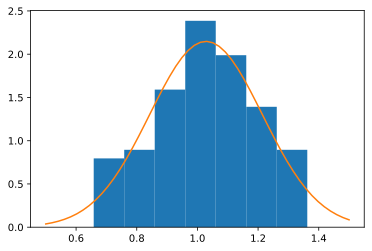

In [414]:
hist(s2n_100_z0p4_lownoise, 'knuth', density=1)
sn = np.linspace(0.5,1.5)
plt.plot(sn, 1/np.sqrt(2*np.pi*1/29)*np.exp(-(sn-s2n_100_z0p4_lownoise.mean())**2/(2*(1/29))))
print(np.std(s2n_100_z0p4_lownoise),1/29**0.5)

In [415]:
"S/N = ", np.mean(s2n_100_z0p4_lownoise/(1/np.sqrt(29))), "+-", np.std(s2n_100_z0p4_lownoise/(1/np.sqrt(29)))/np.sqrt(len(s2n_100_z0p4_lownoise))

('S/N = ', 5.537674395185975, '+-', 0.0928257480233869)

In [274]:
33.90654145869454/29.455227451752116

1.1511213591622644

In [278]:
np.std(s2n_100_z0p4_lownoise)

0.1927968697871685

In [323]:
s2n_100_z0p4 = sims.GetS2N(100, 0.4, 5e14, 3, 1.2, 0.2, 3, nsims=50, quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

(0.2692351437639521-5.898059818321144e-17j) (0.031050699706617817+0j)
(-0.21921633951919178-6.938893903907228e-18j) (0.032601629266069854+2.439454888092385e-19j)
(0.3236894838718085+3.469446951953614e-18j) (0.031395365510937974-8.131516293641283e-20j)
(0.26263642341048343-1.5178830414797062e-17j) (0.031464163217023416-2.710505431213761e-20j)
(-0.0037796635222865846-1.734723475976807e-18j) (0.031780686826818734-5.421010862427522e-20j)
(-0.26056180463814316+6.938893903907228e-18j) (0.03170412072212449-2.168404344971009e-19j)
(-0.2291221953524657+2.6020852139652106e-17j) (0.03146681582195371+1.0842021724855044e-19j)
(0.21032660230955655+1.3877787807814457e-17j) (0.0309726505814243-2.710505431213761e-19j)
(0.08633788969457244+5.117434254131581e-17j) (0.031919567808664125-2.168404344971009e-19j)
(0.25698528788995173-4.163336342344337e-17j) (0.03133956172033244-1.6263032587282567e-19j)
(0.15860784106186568+6.938893903907228e-18j) (0.031475324270222774+0j)
(0.06796326406821962-1.8214596497756

In [325]:
s2n_100_z0p4.mean()

0.24227234628394512

In [260]:
s2n_1000_z0p4.std(), 0.113**0.5

(0.0019716309192307695, 0.3361547262794322)

In [29]:
np.mean(s2n_1000_z0p4), np.std(s2n_1000_z0p4)

(0.824134087534014, 0.5769019646235688)

In [42]:
s2n_1000_z0p2 = sims.GetS2N(1000, 0.2, 3.3e14, 5, 1.2, 0.2, 4.8, nsims=10)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
(0.6816373803502493+0.010008375675519043j) (1.423838179632352-1.2672660117320303e-17j)
(0.45728947412807974-0.23220809199586867j) (1.4381983494454575-5.086423044505567e-18j)
(0.3199068060615222-0.2997561413127479j) (1.428319751644375-4.683677927954681e-19j)
(0.4587386481143323+1.307448456913314j) (1.4276921809766971+3.187026441269288e-18j)
(-0.4121396271125738+0.43275370707669186j) (1.4440598861943834-3.046523756442715e-18j)
(-0.05857969714069908+0.9246105274177296j) (1.4311601927570619-2.604544427960821e-18j)
(0.8297082107033464-0.7787655916486002j) (1.4348383212519342-6.86802536514573e-18j)
(0.6875709335754991-0.6641011177727203j) (1.4377179896399954+1.1509691588455688e-19j)
(1.0078982950128883+0.3666269053761826j) (1.4275912288989474-4.539497578215525e-18j)
(1.4087793858646225+0.032957684249817154j) (1.4160263092865408+1.7767879225772443e-18j)


In [43]:
np.mean(s2n_1000_z0p2), np.std(s2n_1000_z0p2)

(0.3773038452058056, 0.3456268974586253)

In [27]:
np.mean(s2n_1000_z0p2), np.std(s2n_1000_z0p2)

(0.4708416526428724, 0.3710024096369539)

In [28]:
sims.GetVarAlpha(1000, 0.4, 5e14, 0.0001, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(3.9982354676488635e-10+2.807735504171631e-28j)

In [31]:
noises = np.arange(1,11)
alphas_noise_1000_z0p4 = np.zeros(len(noises))
for idn, noise in enumerate(noises):
    print(noise)
    alphas_noise_1000_z0p4[idn] = sims.GetVarAlpha(1000, 0.4, 5e14, noise, 1.2, 0.2, 3,)

1
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


2
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
3
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
4
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
5
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
6
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
7
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
8
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
9
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
10
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [33]:
1./alphas_noise_1000_z0p4

array([24.831131  ,  6.16645756,  2.7596248 ,  1.57429966,  0.99252187,
        0.68891062,  0.50269575,  0.38931915,  0.30532548,  0.24880952])

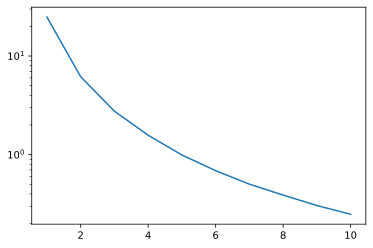

In [37]:
plt.semilogy(noises, 1./alphas_noise_1000_z0p4)

In [350]:
sims.GetVarAlpha(100, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(10.255720234090886+0j)

In [363]:
sims.GetVarAlpha(100, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(10.05631294725869-1.0964474780927136e-17j)

In [367]:
sims.GetS2N(100, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


-0.7988199908236866

In [351]:
sims.GetVarAlpha(100, 0.4, 8e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(5.351034751312385-4.967133112764171e-17j)

In [362]:
sims.GetVarAlpha(100, 0.4, 8e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(5.553656000918138-1.3376060231893983e-17j)

In [352]:
sims.GetVarAlpha(5000, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(0.2002357915490554-1.1128423798377965e-18j)

In [353]:
sims.GetVarAlpha(10000, 0.4, 5e14, 5, 1.2, 0.2, 3,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(0.10080550441131221+0j)

In [24]:
print('%.2e'%scipy.optimize.brentq(lambda M: M500toR500(theory.bkd, 0.2, M=M)-1, 1e14, 1e15))

3.26e+14


In [ ]:
np.rad2deg(M500toR500(theory.bkd, 0.4, M=4e14)/theory.bkd.angular_diameter_distance(0.4))*60

In [41]:
myz = 0.2
np.rad2deg(M500toR500(theory.bkd, myz, M=scipy.optimize.brentq(lambda M: M500toR500(theory.bkd, myz, M=M)-1, 1e14, 1e15))/theory.bkd.angular_diameter_distance(myz))*60




4.883250657721267

In [282]:
masses = np.arange(1,11)
alphas_mass_100_z0p4 = np.zeros(len(masses))
for idm, mass in enumerate(masses):
    print("%2e"%(mass*1e14))
    alphas_mass_100_z0p4[idm] = sims.GetVarAlpha(100, 0.4, mass*1e14, 5, 1.2, 0.2, 3,quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

1.000000e+14
2.000000e+14
3.000000e+14
4.000000e+14
5.000000e+14
6.000000e+14
7.000000e+14
8.000000e+14
9.000000e+14
1.000000e+15


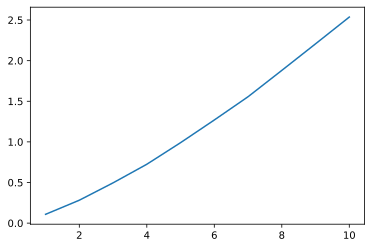

In [23]:
plt.plot(masses, 1./alphas_mass_1000_z0p4)

In [283]:
masses = [1,3,5,7,10] #np.arange(1,11)
noises = [1,3,5,7,10] #np.arange(1,11)
alphas_mass_100_z0p4 = np.zeros((len(masses),len(noises)))
for idm, mass in enumerate(masses):
    for idn, noise in enumerate(noises):
        print("%2e, %.1f"%(mass*1e14,noise))
        alphas_mass_100_z0p4[idm][idn] = sims.GetVarAlpha(100, 0.4, mass*1e14, noise, 1.2, 0.2, 3,quad=(Pc_z0p4, Qc_z0p4, Uc_z0p4))

1.000000e+14, 1.0
1.000000e+14, 3.0
1.000000e+14, 5.0
1.000000e+14, 7.0
1.000000e+14, 10.0
3.000000e+14, 1.0
3.000000e+14, 3.0
3.000000e+14, 5.0
3.000000e+14, 7.0
3.000000e+14, 10.0
5.000000e+14, 1.0
5.000000e+14, 3.0
5.000000e+14, 5.0
5.000000e+14, 7.0
5.000000e+14, 10.0
7.000000e+14, 1.0
7.000000e+14, 3.0
7.000000e+14, 5.0
7.000000e+14, 7.0
7.000000e+14, 10.0
1.000000e+15, 1.0
1.000000e+15, 3.0
1.000000e+15, 5.0
1.000000e+15, 7.0
1.000000e+15, 10.0


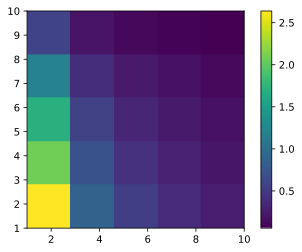

In [313]:
plt.imshow((1/(alphas_mass_100_z0p4**0.5))*np.sqrt(10), extent=[1,10,1,10]);plt.colorbar()

In [316]:
(1/(alphas_mass_100_z0p4**0.5))*np.sqrt(10)

array([[0.57247457, 0.19089216, 0.11501472, 0.08159454, 0.05770236],
       [1.19739464, 0.3991761 , 0.24430314, 0.16923504, 0.11976437],
       [1.69712357, 0.56067409, 0.33931874, 0.24272238, 0.16903841],
       [2.07726468, 0.71160243, 0.42291274, 0.30429952, 0.21192169],
       [2.63859995, 0.88159134, 0.53433176, 0.37862381, 0.26580439]])

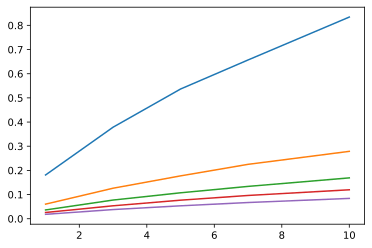

In [322]:
plt.plot([1,3,5,7,10],(1/(alphas_mass_100_z0p4**0.5))[:,0])
plt.plot([1,3,5,7,10],(1/(alphas_mass_100_z0p4**0.5))[:,1])
plt.plot([1,3,5,7,10],(1/(alphas_mass_100_z0p4**0.5))[:,2])
plt.plot([1,3,5,7,10],(1/(alphas_mass_100_z0p4**0.5))[:,3])
plt.plot([1,3,5,7,10],(1/(alphas_mass_100_z0p4**0.5))[:,4])

In [458]:
lmax=10
z=0.4

ells = np.arange(2,lmax+1)
zeta_0p4 = np.asarray([theory.zeta(z, ell) for ell in ells])
xi_0p4 = np.asarray([theory.xi(z, z, ell) for ell in ells])

puncorr_0p4 = (1- zeta_0p4**2/theory.cltt[2:lmax+1])* xi_0p4
pcorr_0p4 = zeta_0p4**2/theory.cltt[2:lmax+1]

z = 1.5 

ells = np.arange(2,lmax+1)
zeta_1p5 = np.asarray([theory.zeta(z, ell) for ell in ells])
xi_1p5 = np.asarray([theory.xi(z, z, ell) for ell in ells])

puncorr_1p5 = (1- zeta_1p5**2/theory.cltt[2:lmax+1])* xi_1p5
pcorr_1p5 = zeta_1p5**2/theory.cltt[2:lmax+1]


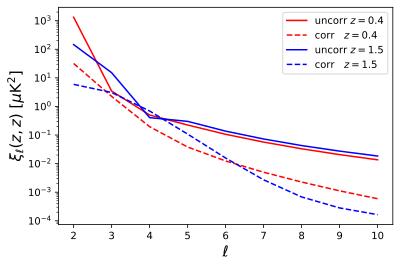

In [460]:
plt.semilogy(ells, np.abs(puncorr_0p4), c='r', ls='-', label=r'uncorr $z=0.4$') 
plt.semilogy(ells, np.abs(pcorr_0p4)  , c='r', ls='--', label=r'corr   $z=0.4$') 
plt.semilogy(ells, np.abs(puncorr_1p5), c='b', ls='-', label=r'uncorr $z=1.5$') 
plt.semilogy(ells, np.abs(pcorr_1p5)  , c='b', ls='--', label=r'corr   $z=1.5$')
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$\xi_{\ell}(z,z)$ [$\mu$K$^2$]', size=15)
plt.legend()

## Load in DES RM cat

In [561]:
from astropy.io import fits

In [562]:
cat = fits.open('/Users/fbianchini/Downloads/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+1_lgt5_vl02_catalog.fit')

In [563]:
cat[1].data.columns

ColDefs(
    name = 'MEM_MATCH_ID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'MODEL_MAG'; format = '4E'
    name = 'MODEL_MAGERR'; format = '4E'
    name = 'REFMAG'; format = 'E'
    name = 'REFMAG_ERR'; format = 'E'
    name = 'ZRED'; format = 'E'
    name = 'ZRED_E'; format = 'E'
    name = 'ZRED_CHISQ'; format = 'E'
    name = 'BCG_SPEC_Z'; format = 'E'
    name = 'Z_SPEC_INIT'; format = 'E'
    name = 'Z_INIT'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'LAMBDA_CHISQ'; format = 'E'
    name = 'LAMBDA_CHISQ_E'; format = 'E'
    name = 'LAMBDA_ZRED'; format = 'E'
    name = 'LAMBDA_ZRED_E'; format = 'E'
    name = 'R_LAMBDA'; format = 'E'
    name = 'SCALEVAL'; format = 'E'
    name = 'MASKFRAC'; format = 'E'
    name = 'GEOMASKFRAC'; format = 'E'
    name = 'C_LAMBDA'; format = '3E'
    name = 'C_LAMBDA_ERR'; format = '3E'
    name = 'MAG_LAMBDA_ERR'; format = '4E'
    name = 'CHISQ'; format = 'E'
    name = 'Z_LAMBDA'; format = 

In [564]:
cat[1].data.RA.size

256236

In [565]:
def Sky2Hpx(sky1, sky2, nside, coord='G', nest=False, rad=False):
	"""
	Converts sky coordinates, i.e. (RA,DEC), to Healpix pixel at a given resolution nside.
	By default, it rotates from EQ -> GAL
	Parameters
	----------
	sky1 : array-like
		First coordinate, it can be RA, LON, ...
	sky2 : array-like
		Second coordinate, it can be DEC, LAT, ...
		
	nside : int
		Resolution of the Healpix pixelization scheme
	coord : str 'C','E' or 'G' [def]
		Coordinate system of the output. If coord='C', *no* rotation is applied
	nest : bool [def=False]
		If True, nested pixelation scheme is considered for the output pixels
	rad : bool [def=False]
		If True, input coordinates are expressed in radians, otherwise in degree
	Returns
	-------
	ipix : array-like
		Pixel indices corresponding to (sky1,sky2) coordinates
	"""
	sky1, sky2 = np.asarray(sky1), np.asarray(sky2)

	if rad == False: # deg -> rad
		theta = np.deg2rad(90.-sky2) 
		phi   = np.deg2rad(sky1) 
	else: 
		theta = np.pi/2. - sky2
		phi   = sky1 	     

	# Apply rotation if needed (default EQ -> GAL)
	r = hp.Rotator(coord=['C',coord], deg=False)
	theta, phi = r(theta, phi)

	npix = hp.nside2npix(nside)

	return hp.ang2pix(nside, theta, phi, nest=nest) # Converting galaxy coordinates -> pixel 

def GetCountsMap(sky1, sky2, nside, coord='G', nest=False, rad=False, sqdeg=False):
	"""
	Creates an Healpix map with sources number counts at resolution nside given two 
	arrays containing SKY1 and SKY2 positions.
	Parameters
	----------
	sky1 : array-like
		First coordinate, it can be RA, LON, ...
	sky2 : array-like
		Second coordinate, it can be DEC, LAT, ...
		
	nside : int
		Resolution of the Healpix pixelization scheme
	coord : str 'C','E' or 'G' [def]
		Coordinate system of the output. If coord='C', *no* rotation is applied
	nest : bool [def=False]
		If True, nested pixelation scheme is considered for the output pixels
	rad : bool [def=False]
		If True, input coordinates are expressed in radians, otherwise in degree
	sqdeg : bool [def=False]
		If True, pixels of the output map contains galaxy density in *square degrees*
	Returns
	-------
	ipix : array-like
		Pixel indices corresponding to (sky1,sky2) coordinates
	"""
	# Get sources position (pixels)
	pix = Sky2Hpx(sky1, sky2, nside, coord=coord, nest=nest, rad=rad)

	# Create counts map
	counts_map = np.bincount(pix, minlength=hp.nside2npix(nside))*1.

	if sqdeg:
		counts_map *= hp.nside2pixarea(nside, degrees=True)

	return counts_map

In [566]:
mask_3g = hp.read_map('/Users/fbianchini/Downloads/3g_mask.fits')

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


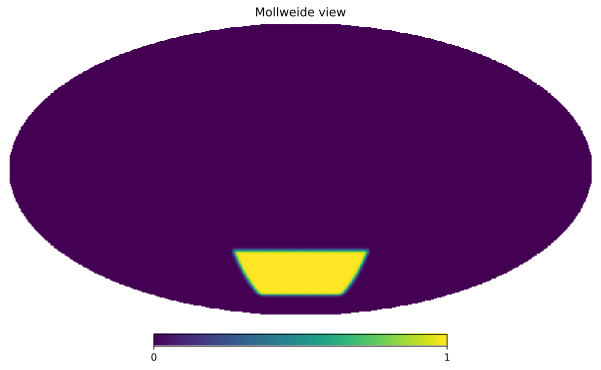

In [567]:
hp.mollview(mask_3g)

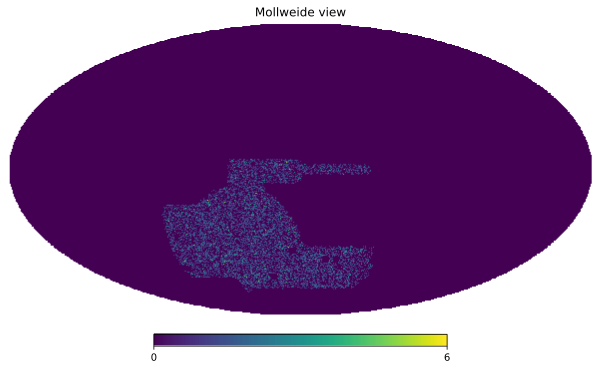

In [568]:
hp.mollview(GetCountsMap(cat[1].data.RA, cat[1].data.DEC, 512, coord='C'))

In [569]:
np.sum(GetCountsMap(cat[1].data.RA[cat[1].data.LAMBDA_CHISQ>20], cat[1].data.DEC[cat[1].data.LAMBDA_CHISQ>20], 2048, coord='C')*mask_3g)

5893.677482584915

(array([0.47609276, 0.9200036 , 1.31730037, 1.93280128, 2.23456167,
        2.53430413, 1.93395511, 0.42413955, 0.05815868, 0.01125651]),
 array([0.10004123, 0.18448234, 0.26892343, 0.35336456, 0.43780565,
        0.5222468 , 0.60668784, 0.69112897, 0.7755701 , 0.86001116,
        0.9444523 ], dtype=float32),
 <a list of 10 Patch objects>)

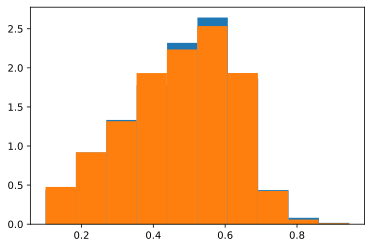

In [34]:
plt.hist(cat[1].data.Z_LAMBDA,density=1)
plt.hist(cat[1].data.Z_LAMBDA[cat[1].data.LAMBDA_CHISQ>10],density=1)

In [81]:
sims.GetVarAlpha(1000, 0.4, 1e15, 5, 1.2, 0.2, 4,)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


(0.39400579856511625-2.451414643149222e-19j)

In [78]:
myz = 0.4
np.rad2deg(M500toR500(theory.bkd, myz, M=scipy.optimize.brentq(lambda M: M500toR500(theory.bkd, myz, M=M)-1, 1e14, 1e16))/theory.bkd.angular_diameter_distance(myz))*60


3.0060648504459606

In [80]:
np.rad2deg(M500toR500(theory.bkd, myz, 1e15)/theory.bkd.angular_diameter_distance(myz))*60

4.041381910467412

In [79]:
cl_smica = hp.anafast(theory.smica*1e6)

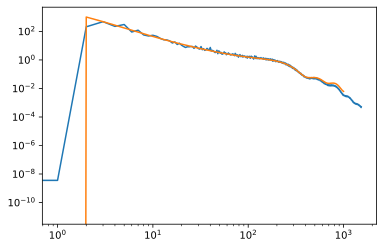

In [80]:
plt.loglog(cl_smica)
plt.loglog(theory.cltt)
# plt.xlim(10,100)

In [86]:
tcmb = hp.ud_grade(theory.smica*1e6,nside_out=hp.npix2nside(Qc_z0p4.size))

In [87]:
cl_pcorr_puncorr = hp.anafast([tcmb,Qc_z0p4, Uc_z0p4], map2=[tcmb,Qu_z0p4, Uu_z0p4], lmax=100)

In [88]:
cl_pcorr_temp = hp.anafast([tcmb,Qc_z0p4, Uc_z0p4],lmax=100)

In [92]:
cl_pcorr_puncorr.shape

(6, 101)

(2, 10)

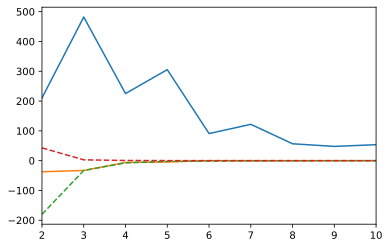

In [129]:
plt.plot(cl_pcorr_puncorr[0,:])
plt.plot(cl_pcorr_temp[3,:])
plt.plot(ells,zeta_tmp, '--')
plt.plot(ells,xi_tmp, '--')
plt.xlim(2,10)
# plt.ylim(1e0,1e2)

In [109]:
cl_pcorr_temp[3,:]

array([-0.00000000e+00,  0.00000000e+00, -3.72517019e+01, -3.29150893e+01,
       -6.03152644e+00, -4.51721540e+00,  1.81078675e-17, -1.77854617e-17,
       -2.42200397e-17, -7.11522152e-18, -3.40691979e-17,  1.71116572e-17,
       -2.73871531e-17, -2.18499041e-17, -4.11509662e-18, -5.71593849e-18,
        1.02973191e-18,  8.87391825e-18, -6.66783215e-18, -1.08023075e-18,
       -1.66626655e-18,  8.00902970e-19,  1.23245451e-18, -2.42092295e-18,
        6.72890842e-19,  3.13038868e-18, -2.85773073e-18,  7.58168968e-19,
        4.85068007e-18, -2.14973640e-19,  8.81664604e-19, -3.17365338e-19,
       -2.17762669e-18, -9.80123183e-19,  4.34997192e-18, -1.41712311e-20,
       -3.90752800e-19, -3.15265281e-19, -7.43398658e-19,  3.70127192e-19,
        3.83920766e-19,  1.25455607e-18, -1.65841840e-18, -1.20819353e-18,
       -2.14039430e-19, -6.35009755e-20, -6.06293914e-19,  1.71619280e-18,
        3.10711714e-19, -5.53301733e-19,  1.05272768e-18, -6.83396949e-19,
       -8.63953124e-20,  

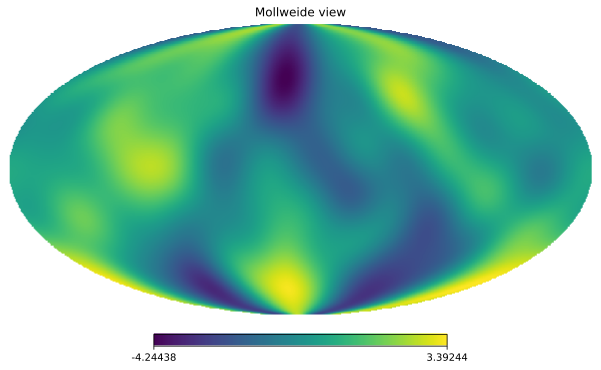

In [113]:
hp.mollview(Uu_z0p4)

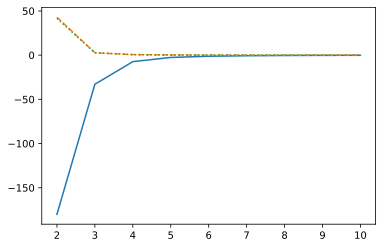

In [137]:
plt.plot(ells,zeta_tmp, '-')
plt.plot(ells,xi_tmp, '--')
plt.plot(ells,xi_z2_tmp, ':')

In [138]:
xi_z2_tmp

array([4.16037373e+01, 2.75146383e+00, 5.94726506e-01, 2.18944369e-01,
       9.78351772e-02, 4.94537687e-02, 2.72517472e-02, 1.59935100e-02,
       9.84937551e-03])

In [139]:
xi_tmp

array([4.29213240e+01, 2.77070646e+00, 6.23505111e-01, 2.33002191e-01,
       1.07499609e-01, 5.69158697e-02, 3.31293071e-02, 2.06751297e-02,
       1.36026344e-02])

In [145]:
pl_tmp = np.zeros((theory.lmax_smica+1,6)) 
pl_tmp[2:10+1,3] = xi_tmp #- zeta_tmp**2/theory.cltt[2:10+1] # muK^2
I_tmp, Q_tmp, U_tmp = hp.synfast(pl_tmp.T, 512)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


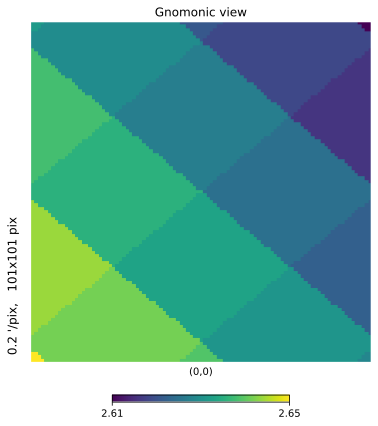

In [159]:
hp.gnomview(np.hypot(Q_tmp,U_tmp),reso=0.2,xsize=101)

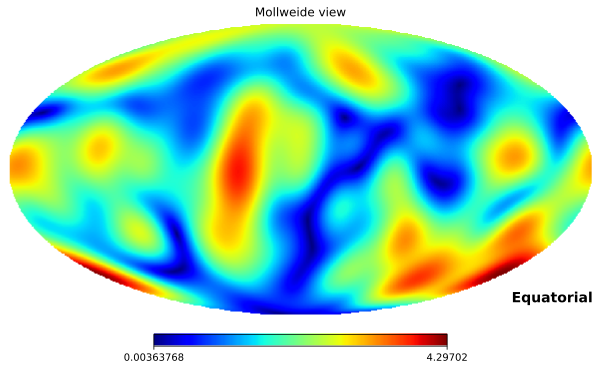

In [157]:
hp.mollview(np.hypot(Qc_z0p4+Qu_z0p4,Uc_z0p4+Uu_z0p4),cmap='jet',coord=['G','C'])

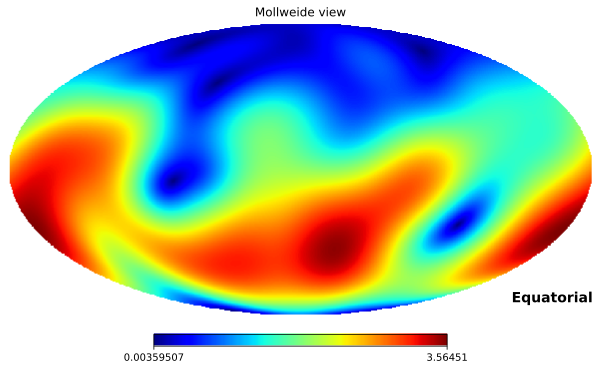

In [155]:
hp.mollview(np.hypot(Qc_z0p4,Uc_z0p4),cmap='jet',coord=['G','C'])

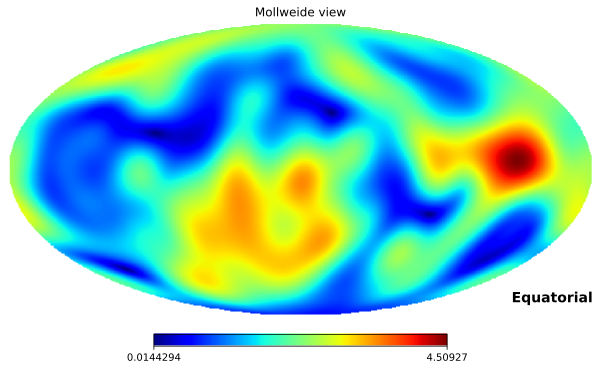

In [156]:
hp.mollview(np.hypot(Qu_z0p4,Uu_z0p4),cmap='jet',coord=['G','C'])

In [163]:
from astropy import units as u

In [164]:
c = SkyCoord(ra=ras_3g*u.degree, dec=decs_3g*u.degree)


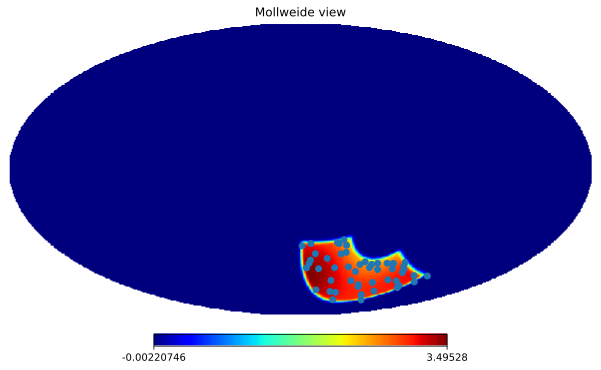

In [205]:
hp.mollview(np.hypot(Qc_z0p4,Uc_z0p4)*mask_3g_gal,cmap='jet',)#coord=['G','C'])
hp.projplot(np.deg2rad(90-c.transform_to('galactic').b.degree[:50]),np.deg2rad(c.transform_to('galactic').l.degree[:50]), 'o')

In [181]:
coord = c.transform_to('galactic')[0]

(array([387., 144.,   0.,   0.,   0.,   0.,   0.,   0., 148., 321.]),
 array([5.08914225e-02, 3.60172907e+01, 7.19836900e+01, 1.07950089e+02,
        1.43916489e+02, 1.79882888e+02, 2.15849287e+02, 2.51815686e+02,
        2.87782086e+02, 3.23748485e+02, 3.59714884e+02]),
 <a list of 10 Patch objects>)

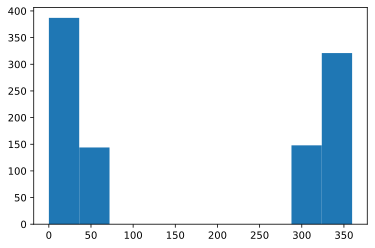

In [193]:
plt.hist(c.ra.deg)


In [202]:
r = hp.Rotator(coord=['C','G']) 
mask_3g_gal = r.rotate_map_alms(mask_3g)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [232]:
GetNoiseMap(101,5,0.2)/np.sqrt(1000)

array([[-0.65876611,  0.18664175, -0.75835574, ...,  0.41533042,
         0.16524962,  0.9311889 ],
       [ 0.70676279,  0.09434074, -0.76126593, ..., -0.54984754,
         1.0763178 , -0.92323201],
       [ 0.38932047, -0.46617757,  0.40519432, ...,  0.59922779,
         0.78601609, -0.61843864],
       ...,
       [-2.04569877, -0.70196508, -1.21465793, ...,  0.54660271,
         0.85401116, -0.17152808],
       [-1.60825862, -0.39934792, -0.56870258, ..., -0.41188215,
         1.21688482, -0.40092574],
       [ 0.19647105, -0.4753385 , -0.49902641, ...,  0.18835121,
         0.36222641,  0.71076739]])

In [231]:
Qcorr_zoom

masked_array(
  data=[[0.80059461, 0.80059461, 0.80059461, ..., 0.76372347, 0.76372347,
         0.76372347],
        [0.80059461, 0.80059461, 0.80059461, ..., 0.76372347, 0.76372347,
         0.76372347],
        [0.80059461, 0.80059461, 0.79786459, ..., 0.76560355, 0.76372347,
         0.76372347],
        ...,
        [0.79284374, 0.79284374, 0.79097637, ..., 0.75873619, 0.75599942,
         0.75599942],
        [0.79284374, 0.79284374, 0.79284374, ..., 0.75599942, 0.75599942,
         0.75599942],
        [0.79284374, 0.79284374, 0.79284374, ..., 0.75599942, 0.75599942,
         0.75599942]],
  mask=False,
  fill_value=-1.6375e+30)

In [236]:
Q_noise     = GetNoiseMap(101,5,0.2)
U_noise     = GetNoiseMap(101,5,0.2)
d_plus_tmp  = (Qcorr_zoom + 1j*Ucorr_zoom) * tau_beam + (Q_noise + 1j*U_noise)
d_minus_tmp = (Qcorr_zoom - 1j*Ucorr_zoom) * tau_beam + (Q_noise - 1j*U_noise)
p_plus_tmp  = (Qcorr_zoom + 1j*Ucorr_zoom) #* tau_beam 
p_minus_tmp = (Qcorr_zoom - 1j*Ucorr_zoom) #* tau_beam 


In [235]:
tau_beam = GaussSmooth(tau, 1.2, 0.2)

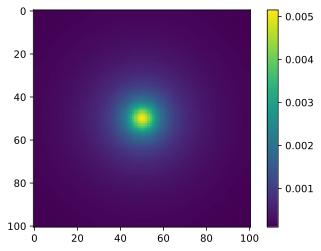

In [248]:
plt.imshow(np.hypot(Qcorr_zoom,Ucorr_zoom) * tau_beam); plt.colorbar()

In [516]:
np.median(cat[1].data.Z_LAMBDA)

0.49251163

In [526]:
import cmocean


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


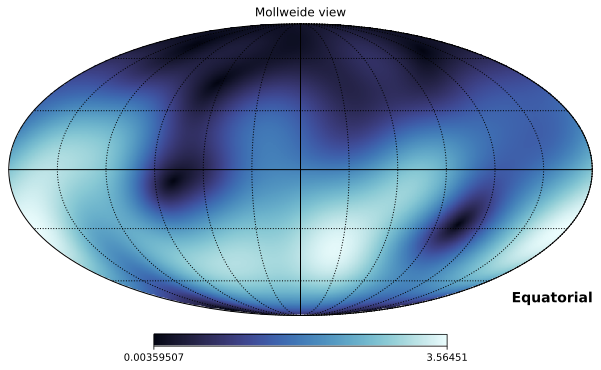

In [538]:
hp.mollview(Pc_z0p4, cmap=cmocean.cm.ice,coord=['G','C'])
hp.graticule()

In [545]:
hp.write_map('/Users/fbianchini/Softwares/cmb_footprint/maps/Pc_z0p4.fits', hp.ud_grade(Pc_z0p4,nside_out=256), overwrite=1)

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/fitsfunc.py:187: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning)


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


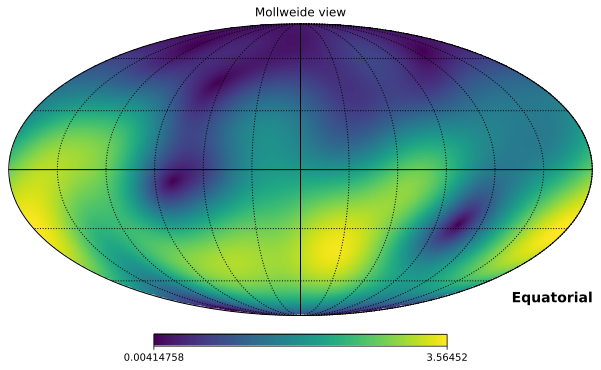

In [546]:
hp.mollview(hp.ud_grade(Pc_z0p4,nside_out=256),coord=['G','C'])
hp.graticule()

In [555]:
Pc_z1p5, Qc_z1p5, Uc_z1p5 = theory.remote_quadrupole(1.5, nside=256, return_QU=1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [556]:
hp.write_map('/Users/fbianchini/Softwares/cmb_footprint/maps/Pc_z1p5.fits', hp.ud_grade(Pc_z1p5,nside_out=256), overwrite=1)